In [1]:
# Finding Python Working Environment and Library Versions
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


In [3]:
# Web access.log Text File to CSV Conversion - Use of Regular Expressions
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import re
import csv

log_file_name = "E:/Python/Thesis/access.log"
csv_file_name = "E:/Python/Thesis/access.csv"

def apache_log_reader(logfile):
    myregex = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

    parts = [
        r'(?P<host>\S+)',                   # host %h
        r'\S+',                             # indent %l (unused)
        r'(?P<user>\S+)',                   # user %u
        r'\[(?P<time>.+)\]',                # time %t
        r'"(?P<request>.+)"',               # request "%r"
        r'(?P<status>[0-9]+)',              # status %>s
        r'(?P<size>\S+)',                   # size in bytes %b (careful, can be '-')
        r'"(?P<referer>.*)"',               # referer "%{Referer}i"
        r'"(?P<agent>.*)"',                 # user agent "%{User-agent}i"
        ]

    lines_written_csv = 0
    lines_read = 0
    
    with open(csv_file_name, 'wb') as out:
         csv_out=csv.writer(out)
         csv_out.writerow(['Host', 'User', 'Date_Time_Stamp', 'Request', 'Status', 'Size', 'Referer', 'User_Agent'])
         #print ("Header Line of CSV File written Seuccessfully...")
         pattern = re.compile(r'\s+'.join(parts)+r'\s*\Z')

         with open(logfile) as f:
            data = f.readline()
                       
            while data:
                lines_read = lines_read + 1
                #print("Lines Read in Log File " + "=> ",  lines_read )
                #print ("Current Row read from Log File:" , data)
                
                m = pattern.match(data)
                
                try:
                    result = m.groups()
                    csv_out.writerow(result)
                    lines_written_csv = lines_written_csv + 1
                except:
                    result = None
                    #print ("Log File Pattern Not Matched...")
                
                data = f.readline()

            print("Total Lines of Log Data Written to CSV File " + "=> ", lines_written_csv)

# Entry Point of Code for Log File to CSV File
if __name__ == '__main__':
       apache_log_reader(log_file_name)   


('Total Lines of Log Data Written to CSV File => ', 11747856)


In [9]:
import csv

log_file_name = "E:/Python/Thesis/access.log"
csv_file_name = "E:/Python/Thesis/access12Dec17.csv"

DW = raw_input('Enter Date like 12/Dec/2017 for Seperating Log File as DD/MON/YYYY and press Enter to Continue:')

def apache_log_reader(log_file_name):
   
   lines_written_csv = 0
   lines_read_log = 0

   with open(csv_file_name, 'wb') as outfile:
         csv_out=csv.writer(outfile)
         csv_out.writerow(['Host','Identity', 'User', 'Date_Time', 'Time_Zone', 'Method',
                           'Request','Version', 'Status', 'Size', 'Referer', 'User_Agent'])
         #print ("Header Line of CSV File written Seuccessfully...")

         with open(log_file_name) as infile:
             log_data_line = infile.readline()

             while log_data_line:

                lines_read_log = lines_read_log + 1
                #print("Lines Read in Log File " + "=> ",  lines_read_log)
                #print ("Current Row read from Log File:" , log_data_line)

                log_line = log_data_line.rstrip()
                splitted_line = log_line.split()
                #print ('Date_Time:', splitted_line[3])
                if len(splitted_line) > 25:
                    DWLog = splitted_line[3]
                #print (DWLog, DW, "Comparing Log Entry Date with User Input Date")  
                try:
                   if splitted_line[3].find(DW) > -1: 
                        #print("Log File Date Matched with User Input Date")
                        csv_out.writerow(splitted_line)
                        lines_written_csv = lines_written_csv + 1
                        #print("Lines Written to CSV File " + "=> ",  lines_written_csv)
                        #print ("Log Line having User Entered Date =>", log_line)
                        #time.sleep(1)
                except:
                   result_log = None

                log_data_line = infile.readline()
         infile.close()
   outfile.close()
   #Summary of Total Log File Lines
   print("Total Lines of Log Data Written to CSV File for Entered Date " + "=> ", lines_written_csv)

# Entry Point of Code for Log File to CSV File Conversion
if __name__ == '__main__':
      apache_log_reader(log_file_name)

Enter Date like 12/Dec/2017 for Seperating Log File as DD/MON/YYYY and press Enter to Continue:12/Dec/2017
('Total Lines of Log Data Written to CSV File for Entered Date => ', 103099)


In [22]:
# Web access.log Text File to SQLite Database Conversion
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import sqlite3

log_file_name = "E:/Python/Thesis/access.log"
db_file_name = "E:/Python/Thesis/access.db"

sql = sqlite3.connect(db_file_name)
cur = sql.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS Log_Enteries
            (Host text, Identity text, User text, Date_Time date, Time_Zone text,
            Method text, Request text, Version text, Status Number, Size Number, Referer text)''')

#print ("Log_Enteries Table Successfully Created in Database!")
lines_written_db = 0
lines_read_log = 0

# fuction to return empty string in list
def list_get(L, i, v="-"):
    if -len(L) <= i < len(L): return L[i]
    else: return v

with open(log_file_name) as infile:
             log_data_line = infile.readline()

             while log_data_line:

                lines_read_log = lines_read_log + 1
                #print("Lines Read from Log File " + "=> ",  lines_read_log)
                #print ("Current Row read from Log File:" , log_data_line)
                log_line = log_data_line.rstrip()
                splitted_line = log_line.split()    
                #print (splitted_line)
                #print ('Referer:', list_get(splitted_line,10))
                p0 = list_get(splitted_line,0)
                p1 = list_get(splitted_line,1)
                p2 = list_get(splitted_line,2)
                p3 = list_get(splitted_line,3)
                p4 = list_get(splitted_line,4)
                p5 = list_get(splitted_line,5)
                p6 = list_get(splitted_line,6)
                p7 = list_get(splitted_line,7)
                p8 = list_get(splitted_line,8)
                p9 = list_get(splitted_line,9)
                p10 = list_get(splitted_line,10)
                #print(p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10)    
                cur.execute("INSERT INTO Log_Enteries VALUES (?,?,?,?,?,?,?,?,?,?,?)",
                           (p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10))
                
                lines_written_db = lines_written_db + 1

                if (lines_written_db % 1000000) == 0:
                    print("Lines Written to DB File " + "=> ",  lines_written_db)
                    sql.commit()

                log_data_line = infile.readline()

print("Total lines written as Records to DB File " + "=> ",  lines_written_db)
infile.close()
sql.commit()
sql.close()



('Lines Written to DB File => ', 1000000)
('Lines Written to DB File => ', 2000000)
('Lines Written to DB File => ', 3000000)
('Lines Written to DB File => ', 4000000)
('Lines Written to DB File => ', 5000000)
('Lines Written to DB File => ', 6000000)
('Lines Written to DB File => ', 7000000)
('Lines Written to DB File => ', 8000000)
('Lines Written to DB File => ', 9000000)
('Lines Written to DB File => ', 10000000)
('Lines Written to DB File => ', 11000000)
('Total lines written as Records to DB File => ', 11747857)


('Start Date of Log Files =>', Timestamp('2017-08-17 00:00:00'))
('End Date of Log Files =>', Timestamp('2017-12-31 00:00:00'))


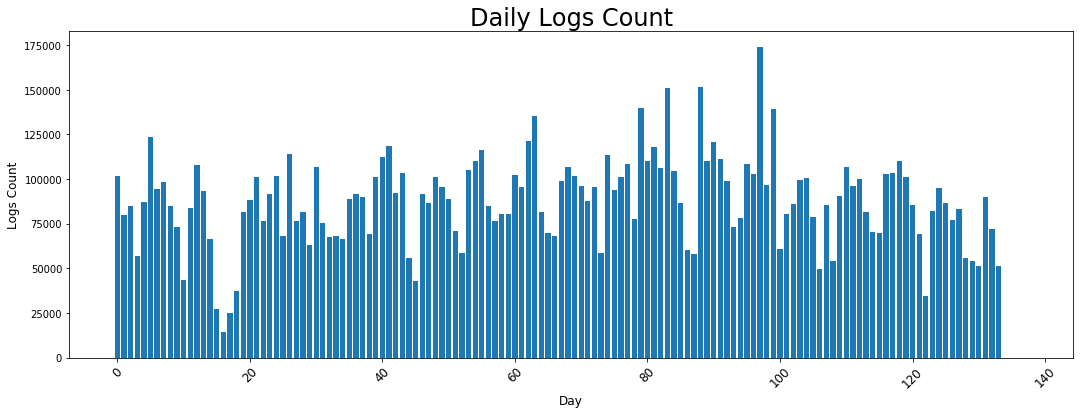

In [7]:
# Web Access log Database File - Finding and Visualizing Daily Logs Count
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

db = sql.connect('E:/Python/Thesis/access.db')
cursor = db.cursor()
cursor.execute('''select substr(Date_Time,2,11) as My_Date, count(Request) as Req_Count from Log_Enteries group by My_Date''')
data_sql = cursor.fetchall()
data_pd = pd.DataFrame(data_sql, columns=list('AB'))
data_pd['A'] = pd.to_datetime(data_pd['A'])
data_pd = data_pd.sort_values(by='A')
data_pd = data_pd.sort_values(['A', 'B'], ascending=[True, False])

#print data_pd.head()

x= data_pd['A']
y= data_pd['B']

datemin = data_pd['A'].min()
print ("Start Date of Log Files =>", datemin)

datemax = data_pd['A'].max()
print ("End Date of Log Files =>", datemax)

# this is for plotting purpose
plt.rcParams["figure.figsize"] = [18.0, 6.0]
index = np.arange(len(x))
plt.bar(index, y)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Logs Count', fontsize=12)

#plt.xticks(index, x, fontsize=12, rotation=45)
plt.xticks(fontsize=12, rotation=45)
plt.title('Daily Logs Count', fontsize=24)
plt.show()
plt.gcf().clear()

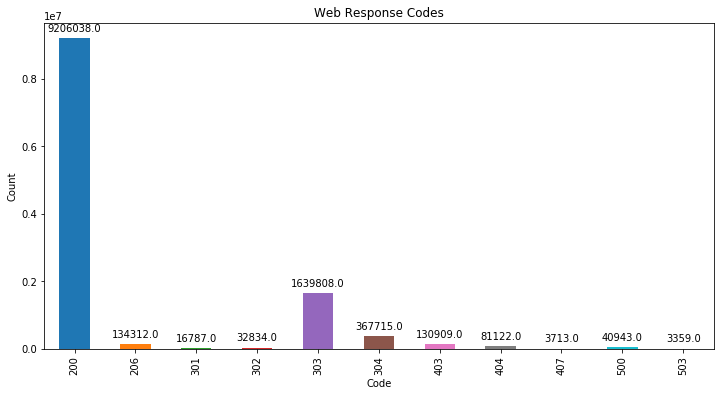

<Figure size 864x864 with 0 Axes>

In [39]:
# Web Access log Database File - Visualizing Web Server Response Codes
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

db = sql.connect('E:/Python/Thesis/access.db')
cursor = db.cursor()
cursor.execute(''' select distinct status, count(status) as st_count
from Log_Enteries where status between 0 and 600
group by status''')

data_sql = cursor.fetchall()
data_pd = pd.DataFrame(data_sql, columns=list('AB'))
data_pd = data_pd[data_pd.B > 1000]
data_pd = data_pd.sort_values(by='A')

x= data_pd['A']
y= data_pd['B']

# Bringing data.
frequencies = y

# For consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)
freq_series = pd.Series(frequencies)

x_labels = x

# Ploting the figure.
plt.figure(figsize=(12, 6))
ax = freq_series.plot(kind='bar')
ax.set_title('Web Server Response Codes', fontsize=18)
ax.set_xlabel('Code')
ax.set_ylabel('Count')
ax.set_xticklabels(x_labels)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

plt.show()
plt.gcf().clear() 


In [9]:
# Web Access log Processing and Storing Cleaned data into Database File 
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import sqlite3

Video_Ext_List = ('.m1v', '.mpeg', '.mov', '.qt', '.mpa', '.mpg', '.mpe', '.avi', '.movie', '.mp4')
Audio_Ext_List = ('.ra', '.aif', '.aiff', '.aifc', '.wav', '.au', '.snd', '.mp3', '.mp2')
Image_Ext_List = ('.ico', '.ras', '.xwd', '.bmp', '.jpe', '.jpg', '.jpeg', '.xpm', '.ief', '.pbm', '.tif',
                  '.gif', '.ppm', '.xbm', '.tiff', '.rgb', '.pgm', '.png', '.pnm')

User_Agent_List = ('bot', 'robot' 'spider', 'crawler', 'yandex')

log_file_name = "E:/Python/Thesis/access.log"
db_file_name = "E:/Python/Thesis/access-cleaned.db"

sql = sqlite3.connect(db_file_name)
cur = sql.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS Log_Enteries_Cleaned
            (Host text, Identity text, User text, Date_Time date, Time_Zone text, Method text,
            Request text, Version text, Status Number, Size Number, Referer text, Browser text)''')

#lines_written_log = 0
lines_written_cleaned = 0
lines_read_log = 0

# fuction to return empty string in list
def list_get(L, i, v="-"):
    if -len(L) <= i < len(L): return L[i]
    else: return v

# fuction to check Video Audio Image CSS Formats and User Agent 
def check_req(St, Res):
    Video_Ext = 0
    Audio_Ext = 0
    Image_Ext = 0
    CSS_Ext = 0
    Usr_Agent = 0

    for vt in Video_Ext_List:
        if St.find(vt)> -1:
            Video_Ext = 1

    for at in Audio_Ext_List:
        if St.find(at)> -1:
            Audio_Ext = 1

    for it in Image_Ext_List:
        if St.find(it)> -1:
            Image_Ext = 1

    if St.find(".css") > -1:
        CSS_Ext = 1
        
    for it in User_Agent_List:
        if St.find(it)> -1:
            Usr_Agent = 1
 
    if (Video_Ext > 0) or (Audio_Ext > 0) or (Image_Ext > 0) or (CSS_Ext > 0) or (Usr_Agent > 0):
        Res = 1
        #print "CSS Audio Video Image Usr-Agent Found"
        return Res
    else:
        Res = 0
        #print "Clean Log File Found"
        return Res

with open(log_file_name) as infile:
             log_data_line = infile.readline()

             while log_data_line:

                lines_read_log = lines_read_log + 1
                #print("Lines Read from Log File " + "=> ",  lines_read_log)
                log_line = log_data_line.rstrip()
                #print (log_line)
                splitted_line = log_line.split()    
                #print (splitted_line)
                #print ('Referer:', list_get(splitted_line,10))
                #print ('Browser:', list_get(splitted_line,11))
                
                p0 = list_get(splitted_line,0)
                p1 = list_get(splitted_line,1)
                p2 = list_get(splitted_line,2)
                p3 = list_get(splitted_line,3)
                p4 = list_get(splitted_line,4)
                p5 = list_get(splitted_line,5)
                p6 = list_get(splitted_line,6)
                p7 = list_get(splitted_line,7)
                p8 = list_get(splitted_line,8)
                p9 = list_get(splitted_line,9)
                p10 = list_get(splitted_line,10)
                p11 = list_get(splitted_line,11)
                
                Res = 0
                if(p5.find("GET")> -1 and p8.find("200") > -1 and (len(p6) > 1) and check_req(p6,Res)== 0 and check_req(p10,Res)== 0):
                    cur.execute("INSERT INTO Log_Enteries_Cleaned VALUES (?,?,?,?,?,?,?,?,?,?,?,?)",(p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11))
                    lines_written_cleaned = lines_written_cleaned + 1               

                if (lines_written_cleaned % 1000000) == 0:
                    print("Cleaned Lines Written to DB File " + "=> ",  lines_written_cleaned)
                    sql.commit()

                log_data_line = infile.readline()

print("Cleaned Lines Written to DB File " + "=> ",  lines_written_cleaned)
                    
infile.close()
sql.commit()
sql.close()

('Cleaned Lines Written to DB File => ', 0)
('Cleaned Lines Written to DB File => ', 0)
('Cleaned Lines Written to DB File => ', 1000000)
('Cleaned Lines Written to DB File => ', 2000000)
('Cleaned Lines Written to DB File => ', 2000000)
('Cleaned Lines Written to DB File => ', 2000000)
('Cleaned Lines Written to DB File => ', 3000000)
('Cleaned Lines Written to DB File => ', 4000000)
('Cleaned Lines Written to DB File => ', 4000000)
('Cleaned Lines Written to DB File => ', 4000000)
('Cleaned Lines Written to DB File => ', 4000000)
('Cleaned Lines Written to DB File => ', 4838453)


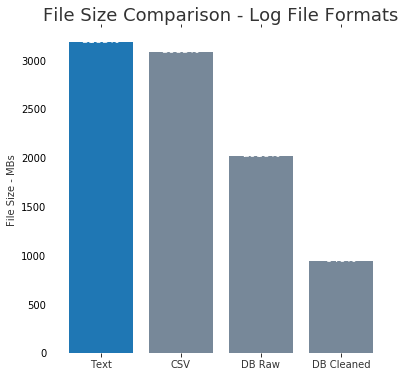

<Figure size 432x432 with 0 Axes>

In [22]:
# Log File Size Comparison - Text CSV Raw-DB Cleaned-DB
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import matplotlib.pyplot as plt
import numpy as np

def file_size(fname):
        import os
        statinfo = os.stat(fname)
        return statinfo.st_size /1000000

plt.figure()

filetypes =['Text', 'CSV', 'DB Raw', 'DB Cleaned']
pos = np.arange(len(filetypes))

filesize = [file_size("E:/Python/Thesis/access.log"),
            file_size("E:/Python/Thesis/access.csv"),
            file_size("E:/Python/Thesis/access.db"),
            file_size("E:/Python/Thesis/access-cleaned.db")]

# change the bar color to be less bright blue
bars = plt.bar(pos, filesize, align='center', linewidth=0, color='lightslategrey')
# make one bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, filetypes, alpha=0.8)
#  Y label since bars are directly labeled
plt.ylabel('File Size - MBs', alpha=0.8)
plt.title('File Size Comparison - Log File Formats', fontsize = '18', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='True', bottom='True', left='False', right='False', labelleft='True', labelbottom='True')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()
plt.gcf().clear() 



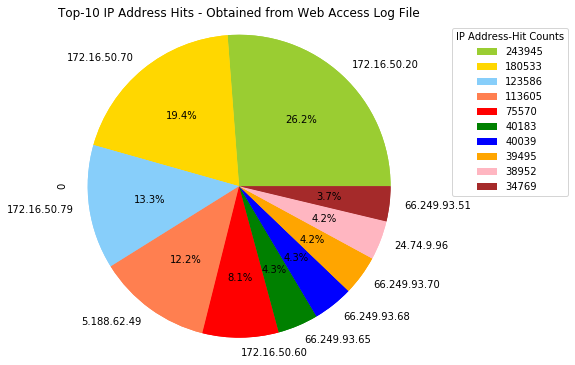

<Figure size 432x432 with 0 Axes>

In [23]:
# Visualizing Top-10 Frequent IP Addresses 
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
pd.set_option('precision',7)

db = sql.connect('E:/Python/Thesis/access-cleaned.db')
cursor = db.cursor()
cursor.execute('''select host from Log_Enteries_Cleaned''')
data_sql = cursor.fetchall()
data_pd = pd.DataFrame(data_sql)
data_pd = data_pd[0].value_counts()

abs_values= []
for x in range(10):
 abs_values.append(data_pd[x]) 

plt.rcParams["figure.figsize"] = [6.0, 6.0]

colors = ['yellowgreen', 'gold', 'lightskyblue', 'coral','red','green','blue','orange','lightpink','brown']
data_pd[:10].plot(kind='pie',title='Top-10 IP Address Hits - Obtained from Web Access Log File',autopct='%1.1f%%', colors=colors)

patches, texts = plt.pie(data_pd[:10], colors=colors)
plt.legend(patches, abs_values, loc="upper right", title="IP Address-Hit Counts",bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()
plt.gcf().clear()

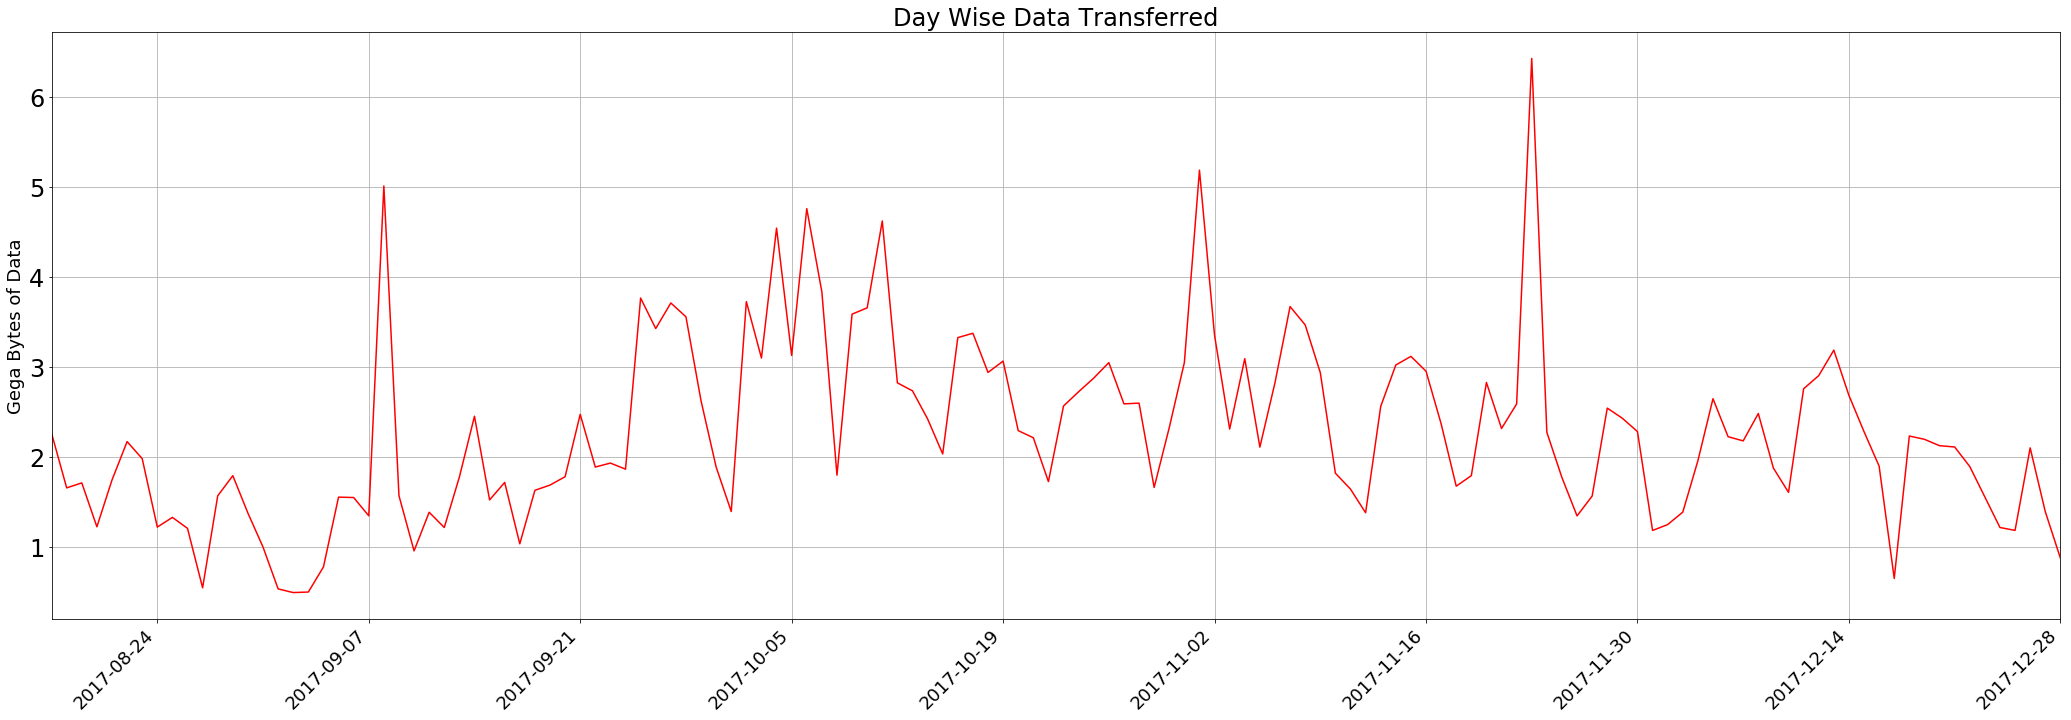

<Figure size 2592x864 with 0 Axes>

In [25]:
# Day Wise Data Transferred - Time Series Chart
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig = plt.figure()
ax = fig.add_subplot(111)

pd.set_option('precision',7)

db = sql.connect('E:/Python/Thesis/access-cleaned.db')
cursor = db.cursor()
cursor.execute('''select substr(Date_Time,2,11) as My_Date, sum(Size)/1000000000 as GB_Transfered from Log_Enteries_Cleaned group by My_Date''')

data_sql = cursor.fetchall()
data_pd = pd.DataFrame(data_sql, columns=list('AB'))
data_pd['A'] = pd.to_datetime(data_pd['A'])
data_pd = data_pd.sort_values(by='A')

mdate= data_pd['A']
mdata=data_pd['B']

datemin = data_pd['A'].min()
datemax = data_pd['A'].max()
ax.set_xlim(datemin, datemax)

fig.autofmt_xdate()

plt.rcParams["figure.figsize"] = [36.0, 12.0]
plt.plot_date(x=mdate, y=mdata, fmt="r-")

plt.title("Day Wise Data Transferred", fontsize=24)
plt.ylabel("Gega Bytes of Data", fontsize=18)

plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=24)
plt.grid(True)
plt.show()
plt.gcf().clear()

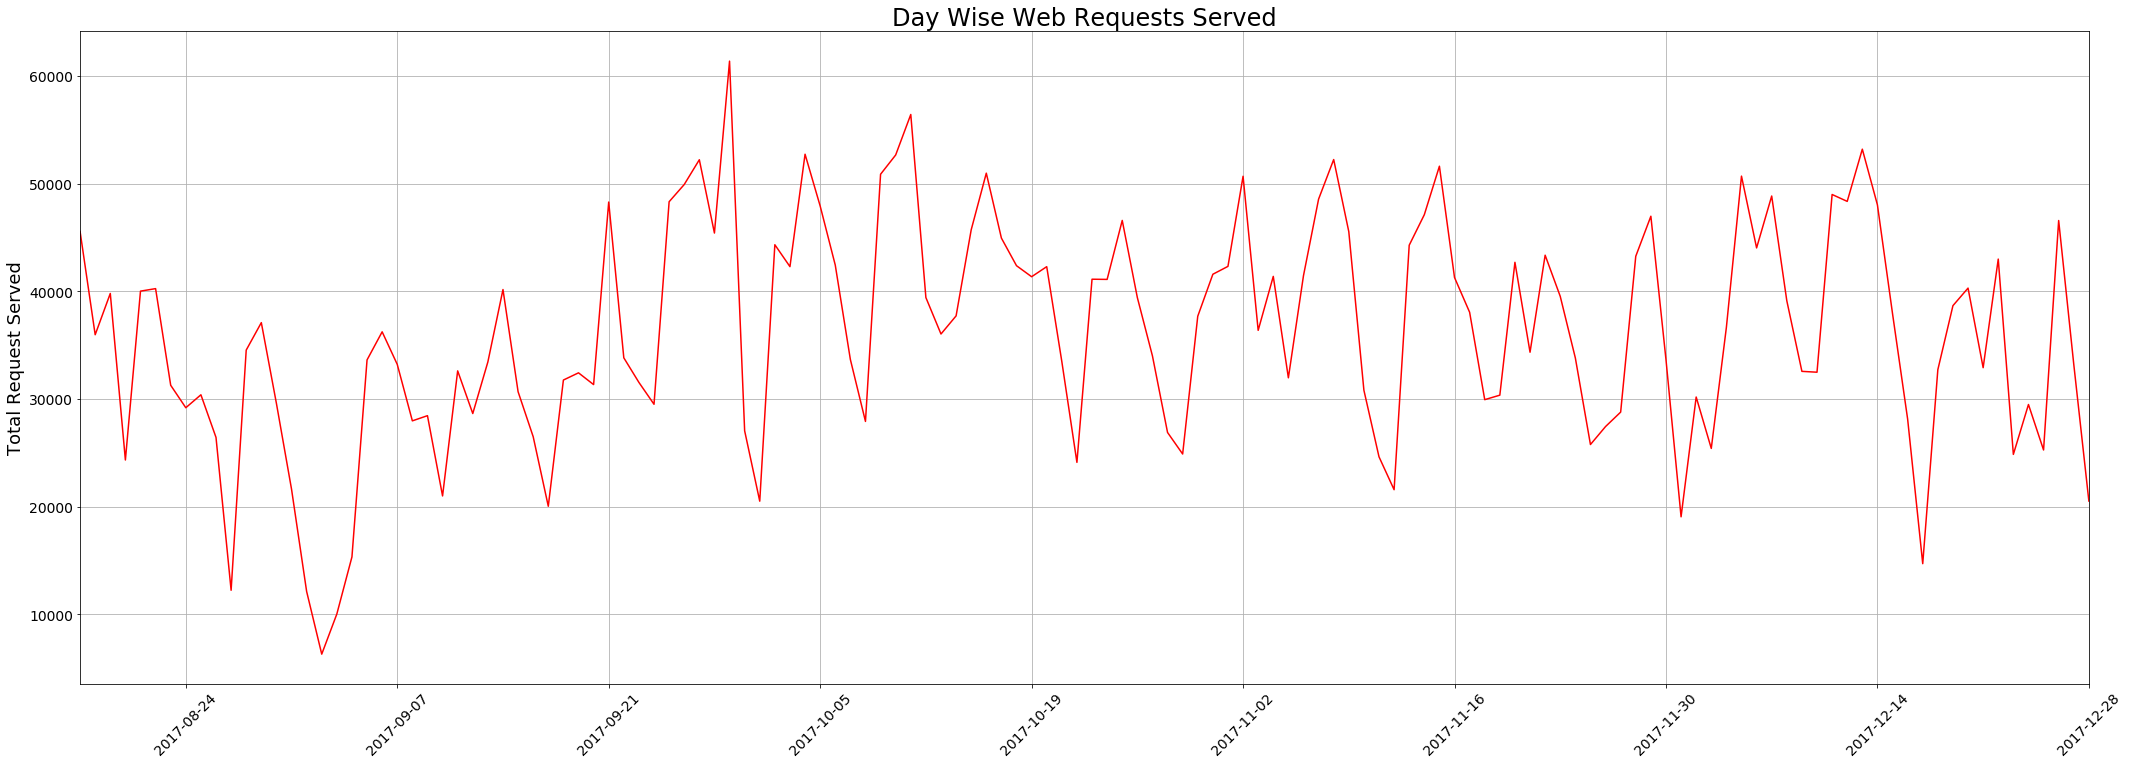

In [26]:
# Day Wise Requests Served - Time Series Chart
# Author: Amjad Zareen Email:amjad(dot)zareen(at)yahoo(dot)com Mob:0092-312-5179244
# Work Made Public as Part of MS Information Security Thesis

import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(111)

pd.set_option('precision',7)

db = sql.connect('E:/Python/Thesis/access-cleaned.db')
cursor = db.cursor()
cursor.execute('''select substr(Date_Time,2,11) as My_Date, count(Request) as Req_Count from Log_Enteries_Cleaned where status = 200 group by My_Date''')
data_sql = cursor.fetchall()
data_pd = pd.DataFrame(data_sql, columns=list('AB'))
data_pd['A'] = pd.to_datetime(data_pd['A'])
data_pd = data_pd.sort_values(by='A')
#print(data_pd.head(10))
mdate= data_pd['A']
datemin = data_pd['A'].min()
datemax = data_pd['A'].max()

mreqcount=data_pd['B'] 

ax.set_xlim(datemin, datemax)
#ax.set_ylim(0, 4000)

plt.rcParams["figure.figsize"] = [24.0, 8.0]
plt.plot_date(x=mdate, y=mreqcount, fmt="r-")

plt.title("Day Wise Web Requests Served", fontsize=24)
plt.ylabel("Total Request Served", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

How many most common words to print: 30

OK. The 30 most common words are as follows

('log', ': ', 105)
('web', ': ', 90)
('server', ': ', 56)
('data', ': ', 55)
('access', ': ', 52)
('logs', ': ', 36)
('file', ': ', 33)
('files', ': ', 32)
('information', ': ', 27)
('format', ': ', 27)
('from', ': ', 24)
('that', ': ', 24)
('request', ': ', 22)
('time', ': ', 22)
('entries', ': ', 21)
('response', ': ', 20)
('client', ': ', 19)
('proposed', ': ', 18)
('used', ': ', 18)
('python', ': ', 18)
('user', ': ', 17)
('security', ': ', 16)
('cleaning', ': ', 15)
('also', ': ', 15)
('which', ': ', 15)
('servers', ': ', 14)
('we', ': ', 13)
('research', ': ', 12)
('if', ': ', 12)
('any', ': ', 12)


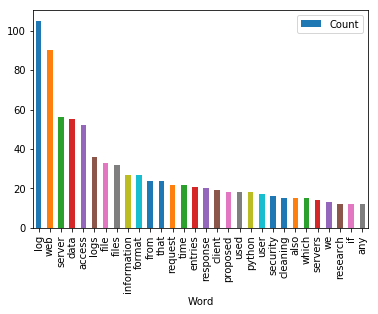

In [11]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# It may be different in your text file
file = open('E:/Python/Thesis/Text1.txt')
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in open('E:/Python/Thesis/Text1.txt'))
stopwords = stopwords.union(set(['or','on','with','of','is','in','a','as', 'the',
                                 'and','to','this','it','can','for','be',
                                 'was','are','an','not','or','by', 'will', 'has']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')